# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [2]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [3]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [4]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n') #filtering only those elements for which x>3
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [5]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [10]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
print(s[1:])
print(s[:-1])

s = s[1:] + s[:-1]
print(s)

#operations are index-wise

a    0.318511
b   -2.019970
c    1.043594
d    0.396088
e   -1.571556
dtype: float64
b   -2.019970
c    1.043594
d    0.396088
e   -1.571556
dtype: float64
a    0.318511
b   -2.019970
c    1.043594
d    0.396088
dtype: float64
a         NaN
b   -4.039941
c    2.087187
d    0.792175
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [12]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2021,11,22,12,45,10,15) #gives it in a good format
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2021'
# or alternatively
date = '22/11/2021 12:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2021-11-22
2021-11-22 12:45:10.000015
22/11/2021 12:45:00
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-23 12:45:00',
               '2021-11-24 12:45:00', '2021-11-25 12:45:00',
               '2021-11-26 12:45:00', '2021-11-27 12:45:00',
               '2021-11-28 12:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 12:45:01',
               '2021-11-22 12:45:02', '2021-11-22 12:45:03',
               '2021-11-22 12:45:04', '2021-11-22 12:45:05',
               '2021-11-22 12:45:06', '2021-11-22 12:45:07',
               '2021-11-22 12:45:08', '2021-11-22 12:45:09',
               ...
               '2021-11-22 13:44:50', '2021-11-22 13:44:51',
               '2021-11-22 13:44:52', '2021-11-22 13:44:53',
               '2021-11-22 13:44:54', '2021-11-22 13:44:55',
               '2021-11-22 13:44:56', '2021-11-22 13:44:57',
               '2021-11-22 13:44:58', '2021-11-22 13:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [13]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [15]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2021-11-22':'2021-11-23'], '\n') # Note - includes end time
print (tseries['2021-11-22':'2021-11-26'], '\n') # it is easy to navigate thruout dates...


2021-11-22 12:45:00     8.841011
2021-11-23 12:45:00    10.638289
2021-11-24 12:45:00    10.613303
2021-11-25 12:45:00     9.942180
Freq: D, dtype: float64 

2021-11-22 12:45:00     8.841011
2021-11-23 12:45:00    10.638289
Freq: D, dtype: float64 

2021-11-22 12:45:00     8.841011
2021-11-23 12:45:00    10.638289
2021-11-24 12:45:00    10.613303
2021-11-25 12:45:00     9.942180
2021-11-26 12:45:00     9.935164
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [16]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [17]:
entries=10
dates=pd.date_range('11/22/2021 12:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2021-11-22 12:45:00,2.998726,0.427204,0.687688,0.396791
2021-11-22 13:45:00,0.125104,0.467632,-0.324287,1.157631
2021-11-22 14:45:00,1.014544,2.036560,-1.056377,0.604430
2021-11-22 15:45:00,0.580973,1.692855,0.674332,1.214583
2021-11-22 16:45:00,-0.112716,-1.255954,1.245305,-1.973199
2021-11-22 17:45:00,-1.023985,1.325770,-0.494770,-1.453859
2021-11-22 18:45:00,-0.800479,0.203739,0.702977,-0.153214
2021-11-22 19:45:00,-0.307066,-1.530216,0.147016,-0.942350
2021-11-22 20:45:00,-0.635257,0.683515,1.200694,-2.354130
2021-11-22 21:45:00,-1.671826,-0.191501,1.540620,0.346486


or by means of a dictionary:


In [21]:
df2 = pd.DataFrame(
    { 'A' : 1., #it broadcats it to all rows
      'B' : pd.Timestamp('20130102'), #same here, broadcasts it
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]), #used in ML for labels/ train_test identification
    }
    )
df2


#indexes in this case are given by default
# check what happens if D and E had different lengths: error, must be same length!!

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [22]:
df.head(2)

,A,B,C,D
2021-11-22 12:45:00,2.998726,0.427204,0.687688,0.396791
2021-11-22 13:45:00,0.125104,0.467632,-0.324287,1.157631


In [23]:
df.tail(4)

,A,B,C,D
2021-11-22 18:45:00,-0.800479,0.203739,0.702977,-0.153214
2021-11-22 19:45:00,-0.307066,-1.530216,0.147016,-0.942350
2021-11-22 20:45:00,-0.635257,0.683515,1.200694,-2.354130
2021-11-22 21:45:00,-1.671826,-0.191501,1.540620,0.346486


In [24]:
df.index

DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 13:45:00',
               '2021-11-22 14:45:00', '2021-11-22 15:45:00',
               '2021-11-22 16:45:00', '2021-11-22 17:45:00',
               '2021-11-22 18:45:00', '2021-11-22 19:45:00',
               '2021-11-22 20:45:00', '2021-11-22 21:45:00'],
              dtype='datetime64[ns]', freq='H')

In [25]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [26]:
df.values

array([[ 2.99872585,  0.42720365,  0.68768798,  0.39679139],
       [ 0.12510366,  0.46763153, -0.32428663,  1.15763133],
       [ 1.01454378,  2.03656019, -1.05637729,  0.60442983],
       [ 0.58097311,  1.69285517,  0.67433245,  1.21458304],
       [-0.11271601, -1.25595394,  1.2453045 , -1.97319939],
       [-1.02398459,  1.3257698 , -0.49476975, -1.45385871],
       [-0.8004785 ,  0.20373903,  0.70297691, -0.15321444],
       [-0.30706623, -1.53021593,  0.14701622, -0.94234978],
       [-0.63525719,  0.68351477,  1.20069417, -2.3541304 ],
       [-1.6718257 , -0.19150099,  1.54062017,  0.34648587]])

In [27]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.016802,0.385960,0.432320,-0.315683
std,1.306687,1.161746,0.843687,1.287644
min,-1.671826,-1.530216,-1.056377,-2.354130
25%,-0.759173,-0.092691,-0.206461,-1.325981
50%,-0.209891,0.447418,0.681010,0.096636
75%,0.467006,1.165206,1.076265,0.552520
max,2.998726,2.036560,1.540620,1.214583


In [28]:
df.T

,2021-11-22 12:45:00,2021-11-22 13:45:00,2021-11-22 14:45:00,2021-11-22 15:45:00,2021-11-22 16:45:00,2021-11-22 17:45:00,2021-11-22 18:45:00,2021-11-22 19:45:00,2021-11-22 20:45:00,2021-11-22 21:45:00
A,2.998726,0.125104,1.014544,0.580973,-0.112716,-1.023985,-0.800479,-0.307066,-0.635257,-1.671826
B,0.427204,0.467632,2.036560,1.692855,-1.255954,1.325770,0.203739,-1.530216,0.683515,-0.191501
C,0.687688,-0.324287,-1.056377,0.674332,1.245305,-0.494770,0.702977,0.147016,1.200694,1.540620
D,0.396791,1.157631,0.604430,1.214583,-1.973199,-1.453859,-0.153214,-0.942350,-2.354130,0.346486


In [29]:
df.sort_index(axis=0,ascending=True) #sort==ordinare per

,A,B,C,D
2021-11-22 12:45:00,2.998726,0.427204,0.687688,0.396791
2021-11-22 13:45:00,0.125104,0.467632,-0.324287,1.157631
2021-11-22 14:45:00,1.014544,2.036560,-1.056377,0.604430
2021-11-22 15:45:00,0.580973,1.692855,0.674332,1.214583
2021-11-22 16:45:00,-0.112716,-1.255954,1.245305,-1.973199
2021-11-22 17:45:00,-1.023985,1.325770,-0.494770,-1.453859
2021-11-22 18:45:00,-0.800479,0.203739,0.702977,-0.153214
2021-11-22 19:45:00,-0.307066,-1.530216,0.147016,-0.942350
2021-11-22 20:45:00,-0.635257,0.683515,1.200694,-2.354130
2021-11-22 21:45:00,-1.671826,-0.191501,1.540620,0.346486


In [30]:
df.sort_values(by="C") 

,A,B,C,D
2021-11-22 14:45:00,1.014544,2.036560,-1.056377,0.604430
2021-11-22 17:45:00,-1.023985,1.325770,-0.494770,-1.453859
2021-11-22 13:45:00,0.125104,0.467632,-0.324287,1.157631
2021-11-22 19:45:00,-0.307066,-1.530216,0.147016,-0.942350
2021-11-22 15:45:00,0.580973,1.692855,0.674332,1.214583
2021-11-22 12:45:00,2.998726,0.427204,0.687688,0.396791
2021-11-22 18:45:00,-0.800479,0.203739,0.702977,-0.153214
2021-11-22 20:45:00,-0.635257,0.683515,1.200694,-2.354130
2021-11-22 16:45:00,-0.112716,-1.255954,1.245305,-1.973199
2021-11-22 21:45:00,-1.671826,-0.191501,1.540620,0.346486


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [31]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..(e.g. "Enviroment T"))
print (df.A)

2021-11-22 12:45:00    2.998726
2021-11-22 13:45:00    0.125104
2021-11-22 14:45:00    1.014544
2021-11-22 15:45:00    0.580973
2021-11-22 16:45:00   -0.112716
2021-11-22 17:45:00   -1.023985
2021-11-22 18:45:00   -0.800479
2021-11-22 19:45:00   -0.307066
2021-11-22 20:45:00   -0.635257
2021-11-22 21:45:00   -1.671826
Freq: H, Name: A, dtype: float64 

2021-11-22 12:45:00    2.998726
2021-11-22 13:45:00    0.125104
2021-11-22 14:45:00    1.014544
2021-11-22 15:45:00    0.580973
2021-11-22 16:45:00   -0.112716
2021-11-22 17:45:00   -1.023985
2021-11-22 18:45:00   -0.800479
2021-11-22 19:45:00   -0.307066
2021-11-22 20:45:00   -0.635257
2021-11-22 21:45:00   -1.671826
Freq: H, Name: A, dtype: float64


In [32]:
# selecting rows by counting
print (df[0:3]) 

# or by index
print (df["2021-11-22 12:45:00":"2021-11-22 14:45:00"])

                            A         B         C         D
2021-11-22 12:45:00  2.998726  0.427204  0.687688  0.396791
2021-11-22 13:45:00  0.125104  0.467632 -0.324287  1.157631
2021-11-22 14:45:00  1.014544  2.036560 -1.056377  0.604430
                            A         B         C         D
2021-11-22 12:45:00  2.998726  0.427204  0.687688  0.396791
2021-11-22 13:45:00  0.125104  0.467632 -0.324287  1.157631
2021-11-22 14:45:00  1.014544  2.036560 -1.056377  0.604430


### Selection by label

In [33]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    2.998726
B    0.427204
C    0.687688
D    0.396791
Name: 2021-11-22 12:45:00, dtype: float64

In [34]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2021-11-22 12:45:00,2.998726,0.427204
2021-11-22 13:45:00,0.125104,0.467632
2021-11-22 14:45:00,1.014544,2.036560
2021-11-22 15:45:00,0.580973,1.692855
2021-11-22 16:45:00,-0.112716,-1.255954
2021-11-22 17:45:00,-1.023985,1.325770
2021-11-22 18:45:00,-0.800479,0.203739
2021-11-22 19:45:00,-0.307066,-1.530216
2021-11-22 20:45:00,-0.635257,0.683515
2021-11-22 21:45:00,-1.671826,-0.191501


In [ ]:
# showing label slicing, both endpoints are included:
df.loc['2021-11-22 16:45:00':'2021-11-22 18:45:00',['A','B']]

In [ ]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

### Selecting by position

In [35]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.580973
B    1.692855
C    0.674332
D    1.214583
Name: 2021-11-22 15:45:00, dtype: float64 

                            A         B
2021-11-22 15:45:00  0.580973  1.692855
2021-11-22 16:45:00 -0.112716 -1.255954


In [ ]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

In [37]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2021-11-22 13:45:00  0.125104  0.467632 -0.324287  1.157631
2021-11-22 14:45:00  1.014544  2.036560 -1.056377  0.604430 

                            B         C
2021-11-22 12:45:00  0.427204  0.687688
2021-11-22 13:45:00  0.467632 -0.324287
2021-11-22 14:45:00  2.036560 -1.056377
2021-11-22 15:45:00  1.692855  0.674332
2021-11-22 16:45:00 -1.255954  1.245305
2021-11-22 17:45:00  1.325770 -0.494770
2021-11-22 18:45:00  0.203739  0.702977
2021-11-22 19:45:00 -1.530216  0.147016
2021-11-22 20:45:00  0.683515  1.200694
2021-11-22 21:45:00 -0.191501  1.540620


In [36]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


0.46763153076862424

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [38]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2021-11-22 12:45:00,2.998726,0.427204,0.687688,0.396791
2021-11-22 13:45:00,0.125104,0.467632,-0.324287,1.157631
2021-11-22 14:45:00,1.014544,2.036560,-1.056377,0.604430
2021-11-22 15:45:00,0.580973,1.692855,0.674332,1.214583
2021-11-22 17:45:00,-1.023985,1.325770,-0.494770,-1.453859
2021-11-22 18:45:00,-0.800479,0.203739,0.702977,-0.153214
2021-11-22 20:45:00,-0.635257,0.683515,1.200694,-2.354130


In [39]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2021-11-22 12:45:00,2.998726,0.427204,0.687688,0.396791
2021-11-22 13:45:00,0.125104,0.467632,NaN,1.157631
2021-11-22 14:45:00,1.014544,2.036560,NaN,0.604430
2021-11-22 15:45:00,0.580973,1.692855,0.674332,1.214583
2021-11-22 16:45:00,NaN,NaN,1.245305,NaN
2021-11-22 17:45:00,NaN,1.325770,NaN,NaN
2021-11-22 18:45:00,NaN,0.203739,0.702977,NaN
2021-11-22 19:45:00,NaN,NaN,0.147016,NaN
2021-11-22 20:45:00,NaN,0.683515,1.200694,NaN
2021-11-22 21:45:00,NaN,NaN,1.540620,0.346486


### Setting

Combination of selection and setting of values

In [41]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brand new column
df['E'] = np.arange(len(df))*0.5

# defining a brand new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [42]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.427204,0.687688,5,0.0,0,1.000000
2021-11-22 13:45:00,0.125104,0.467632,-0.324287,5,0.5,2,0.999962
2021-11-22 14:45:00,1.014544,2.036560,-1.056377,5,1.0,4,0.999848
2021-11-22 15:45:00,0.580973,1.692855,0.674332,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.112716,-1.255954,1.245305,5,2.0,8,0.999391
2021-11-22 17:45:00,-1.023985,1.325770,-0.494770,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.800479,0.203739,0.702977,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.307066,-1.530216,0.147016,5,3.5,14,0.998135
2021-11-22 20:45:00,-0.635257,0.683515,1.200694,5,4.0,16,0.997564
2021-11-22 21:45:00,-1.671826,-0.191501,1.540620,5,4.5,18,0.996917


In [43]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.427204,-0.687688,-5,0.0,0,-1.000000
2021-11-22 13:45:00,-0.125104,-0.467632,-0.324287,-5,-0.5,-2,-0.999962
2021-11-22 14:45:00,-1.014544,-2.036560,-1.056377,-5,-1.0,-4,-0.999848
2021-11-22 15:45:00,-0.580973,-1.692855,-0.674332,-5,-1.5,-6,-0.999657
2021-11-22 16:45:00,-0.112716,-1.255954,-1.245305,-5,-2.0,-8,-0.999391
2021-11-22 17:45:00,-1.023985,-1.325770,-0.494770,-5,-2.5,-10,-0.999048
2021-11-22 18:45:00,-0.800479,-0.203739,-0.702977,-5,-3.0,-12,-0.998630
2021-11-22 19:45:00,-0.307066,-1.530216,-0.147016,-5,-3.5,-14,-0.998135
2021-11-22 20:45:00,-0.635257,-0.683515,-1.200694,-5,-4.0,-16,-0.997564
2021-11-22 21:45:00,-1.671826,-0.191501,-1.540620,-5,-4.5,-18,-0.996917


In [ ]:
df

### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [45]:
# Dropping by column
df.drop(['E prime'], axis=1) #it doesn't affect df

#to really drop it you need to copy the dropped dataframe into a new one 
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2021-11-22 12:45:00,0.000000,0.427204,0.687688,5,0.0,1.000000
2021-11-22 13:45:00,0.125104,0.467632,-0.324287,5,0.5,0.999962
2021-11-22 14:45:00,1.014544,2.036560,-1.056377,5,1.0,0.999848
2021-11-22 15:45:00,0.580973,1.692855,0.674332,5,1.5,0.999657
2021-11-22 16:45:00,-0.112716,-1.255954,1.245305,5,2.0,0.999391
2021-11-22 17:45:00,-1.023985,1.325770,-0.494770,5,2.5,0.999048
2021-11-22 18:45:00,-0.800479,0.203739,0.702977,5,3.0,0.998630
2021-11-22 19:45:00,-0.307066,-1.530216,0.147016,5,3.5,0.998135
2021-11-22 20:45:00,-0.635257,0.683515,1.200694,5,4.0,0.997564
2021-11-22 21:45:00,-1.671826,-0.191501,1.540620,5,4.5,0.996917


In [47]:
# Dropping by rows
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.427204,0.687688,5,0.0,0,1.000000
2021-11-22 17:45:00,-1.023985,1.325770,-0.494770,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.800479,0.203739,0.702977,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.307066,-1.530216,0.147016,5,3.5,14,0.998135
2021-11-22 20:45:00,-0.635257,0.683515,1.200694,5,4.0,16,0.997564
2021-11-22 21:45:00,-1.671826,-0.191501,1.540620,5,4.5,18,0.996917


In [ ]:
df

In [ ]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2021-11-22 20:45:00"))

## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [48]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,0.427204,0.687688,5,NaN,NaN,1.000000
2021-11-22 13:45:00,0.125104,0.467632,NaN,5,0.5,2.0,0.999962
2021-11-22 14:45:00,1.014544,2.036560,NaN,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.580973,1.692855,0.674332,5,1.5,6.0,0.999657
2021-11-22 16:45:00,NaN,NaN,1.245305,5,2.0,8.0,0.999391
2021-11-22 17:45:00,NaN,1.325770,NaN,5,2.5,10.0,0.999048
2021-11-22 18:45:00,NaN,0.203739,0.702977,5,3.0,12.0,0.998630
2021-11-22 19:45:00,NaN,NaN,0.147016,5,3.5,14.0,0.998135
2021-11-22 20:45:00,NaN,0.683515,1.200694,5,4.0,16.0,0.997564
2021-11-22 21:45:00,NaN,NaN,1.540620,5,4.5,18.0,0.996917


In [49]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2021-11-22 15:45:00,0.580973,1.692855,0.674332,5,1.5,6.0,0.999657


In [50]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,True,False,False,False,True,True,False
2021-11-22 13:45:00,False,False,True,False,False,False,False
2021-11-22 14:45:00,False,False,True,False,False,False,False
2021-11-22 15:45:00,False,False,False,False,False,False,False
2021-11-22 16:45:00,True,True,False,False,False,False,False
2021-11-22 17:45:00,True,False,True,False,False,False,False
2021-11-22 18:45:00,True,False,False,False,False,False,False
2021-11-22 19:45:00,True,True,False,False,False,False,False
2021-11-22 20:45:00,True,False,False,False,False,False,False
2021-11-22 21:45:00,True,True,False,False,False,False,False


In [51]:
# filling missing data
df_wNan.fillna(value=0) #puts a value instead of Nan

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.427204,0.687688,5,0.0,0.0,1.000000
2021-11-22 13:45:00,0.125104,0.467632,0.000000,5,0.5,2.0,0.999962
2021-11-22 14:45:00,1.014544,2.036560,0.000000,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.580973,1.692855,0.674332,5,1.5,6.0,0.999657
2021-11-22 16:45:00,0.000000,0.000000,1.245305,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.000000,1.325770,0.000000,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.000000,0.203739,0.702977,5,3.0,12.0,0.998630
2021-11-22 19:45:00,0.000000,0.000000,0.147016,5,3.5,14.0,0.998135
2021-11-22 20:45:00,0.000000,0.683515,1.200694,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.000000,0.000000,1.540620,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [52]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,0.427204,0.687688,5,NaN,NaN,1.000000
2021-11-22 13:45:00,0.125104,0.467632,0.687688,5,0.5,2.0,0.999962
2021-11-22 14:45:00,1.014544,2.036560,0.687688,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.580973,1.692855,0.674332,5,1.5,6.0,0.999657
2021-11-22 16:45:00,0.580973,1.692855,1.245305,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.580973,1.325770,1.245305,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.580973,0.203739,0.702977,5,3.0,12.0,0.998630
2021-11-22 19:45:00,0.580973,0.203739,0.147016,5,3.5,14.0,0.998135
2021-11-22 20:45:00,0.580973,0.683515,1.200694,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.580973,0.683515,1.540620,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [53]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.283071
B          0.385960
C          0.432320
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2021-11-22 12:45:00    1.016413
2021-11-22 13:45:00    1.252630
2021-11-22 14:45:00    1.856368
2021-11-22 15:45:00    2.349688
2021-11-22 16:45:00    2.268004
2021-11-22 17:45:00    2.615152
2021-11-22 18:45:00    3.014981
2021-11-22 19:45:00    3.115410
2021-11-22 20:45:00    3.892359
2021-11-22 21:45:00    4.024887
Freq: H, dtype: float64 



In [54]:
# global operations on columns
df.apply(np.cumsum) #cumulative sum

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.427204,0.687688,5,0.0,0,1.000000
2021-11-22 13:45:00,0.125104,0.894835,0.363401,10,0.5,2,1.999962
2021-11-22 14:45:00,1.139647,2.931395,-0.692976,15,1.5,6,2.999810
2021-11-22 15:45:00,1.720621,4.624251,-0.018643,20,3.0,12,3.999467
2021-11-22 16:45:00,1.607905,3.368297,1.226661,25,5.0,20,4.998858
2021-11-22 17:45:00,0.583920,4.694066,0.731891,30,7.5,30,5.997906
2021-11-22 18:45:00,-0.216559,4.897805,1.434868,35,10.5,42,6.996536
2021-11-22 19:45:00,-0.523625,3.367590,1.581884,40,14.0,56,7.994670
2021-11-22 20:45:00,-1.158882,4.051104,2.782579,45,18.0,72,8.992234
2021-11-22 21:45:00,-2.830708,3.859603,4.323199,50,22.5,90,9.989152


In [55]:
df #nothing changed bc we didn't copy it into another df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.427204,0.687688,5,0.0,0,1.000000
2021-11-22 13:45:00,0.125104,0.467632,-0.324287,5,0.5,2,0.999962
2021-11-22 14:45:00,1.014544,2.036560,-1.056377,5,1.0,4,0.999848
2021-11-22 15:45:00,0.580973,1.692855,0.674332,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.112716,-1.255954,1.245305,5,2.0,8,0.999391
2021-11-22 17:45:00,-1.023985,1.325770,-0.494770,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.800479,0.203739,0.702977,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.307066,-1.530216,0.147016,5,3.5,14,0.998135
2021-11-22 20:45:00,-0.635257,0.683515,1.200694,5,4.0,16,0.997564
2021-11-22 21:45:00,-1.671826,-0.191501,1.540620,5,4.5,18,0.996917


In [56]:
df.apply(lambda x: x.max() - x.min())

A           2.686369
B           3.566776
C           2.596997
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [57]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2021-11-22 12:45:00    0.427204
2021-11-22 13:45:00    0.592735
2021-11-22 14:45:00    3.051104
2021-11-22 15:45:00    2.273828
2021-11-22 16:45:00   -1.368670
2021-11-22 17:45:00    0.301785
2021-11-22 18:45:00   -0.596739
2021-11-22 19:45:00   -1.837282
2021-11-22 20:45:00    0.048258
2021-11-22 21:45:00   -1.863327
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [60]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

#superfast

--2021-11-22 13:57:11--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2021-11-22 13:57:12--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1a94eadb6af09474cded2c73e1.dl.dropboxusercontent.com/cd/0/inline/BacHJOqd2SOxURSY3cJl_FXtLk9166dV2OMa36OGXda-baLFVi6Jk4VvqFeSdQY3PRuOQz5s59gtkspg9pZOhJknCoziGP8JG9IWm1gs8RlWxe9NVAPzW2qSiQRjcyOQxZZ6eJLdN3HXWlx-JVeQZo45/file# [following]
--2021-11-22 13:57:12--  https://uc1a94eadb6af09474cded2c73e1.dl.dropboxusercontent.com/cd/0/inline/BacHJOqd2SOxURSY3cJl_FXtLk9166dV2OMa36OGXda-baLFVi6Jk4VvqFeSdQY3PRuOQz5s59gtkspg9pZOhJknCoziGP8JG9IWm1gs8Rl

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [59]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [62]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [61]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [63]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-0.567500,-0.571582,0.490223,-0.422921
1,-0.376521,0.810913,-0.194205,-1.308370
2,-0.809387,-0.101103,0.487649,-1.962626
3,0.890597,0.132010,-0.091822,0.153704
4,0.356430,1.052301,-1.433052,-0.061812
5,-1.339181,-0.787863,-0.729093,0.985044
6,-0.666915,0.111545,0.825076,0.791525
7,-1.313024,-0.150492,0.439069,-0.153343
8,0.221533,-0.483299,0.150216,0.025427
9,0.330772,-0.277451,-1.117301,-1.269162


In [64]:
# divide it into pieaces row-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -0.567500 -0.571582  0.490223 -0.422921
 1 -0.376521  0.810913 -0.194205 -1.308370
 2 -0.809387 -0.101103  0.487649 -1.962626,
           0         1         2         3
 3  0.890597  0.132010 -0.091822  0.153704
 4  0.356430  1.052301 -1.433052 -0.061812
 5 -1.339181 -0.787863 -0.729093  0.985044
 6 -0.666915  0.111545  0.825076  0.791525,
           0         1         2         3
 7 -1.313024 -0.150492  0.439069 -0.153343
 8  0.221533 -0.483299  0.150216  0.025427
 9  0.330772 -0.277451 -1.117301 -1.269162]

In [65]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-0.567500,-0.571582,0.490223,-0.422921
1,-0.376521,0.810913,-0.194205,-1.308370
2,-0.809387,-0.101103,0.487649,-1.962626
3,0.890597,0.132010,-0.091822,0.153704
4,0.356430,1.052301,-1.433052,-0.061812
5,-1.339181,-0.787863,-0.729093,0.985044
6,-0.666915,0.111545,0.825076,0.791525
7,-1.313024,-0.150492,0.439069,-0.153343
8,0.221533,-0.483299,0.150216,0.025427
9,0.330772,-0.277451,-1.117301,-1.269162


In [66]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,-0.567500,-0.571582,0.490223,-0.422921
1,-0.376521,0.810913,-0.194205,-1.308370
2,-0.809387,-0.101103,0.487649,-1.962626
3,0.890597,0.132010,-0.091822,0.153704
4,0.356430,1.052301,-1.433052,-0.061812
5,-1.339181,-0.787863,-0.729093,0.985044
6,-0.666915,0.111545,0.825076,0.791525
7,-1.313024,-0.150492,0.439069,-0.153343
8,0.221533,-0.483299,0.150216,0.025427
9,0.330772,-0.277451,-1.117301,-1.269162


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [67]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [68]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-1.332025,-0.342561
1,bar,one,0.146505,1.699953
2,foo,two,-1.113268,1.611953
3,bar,three,1.625241,-0.637074
4,foo,two,0.080245,0.828550
5,bar,two,-1.397115,-1.881687
6,foo,one,-0.632582,-0.623818
7,foo,three,0.449517,0.038249


In [69]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,0.374632,-0.818808
foo,-2.548113,1.512373


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [ ]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


In [ ]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

In [ ]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

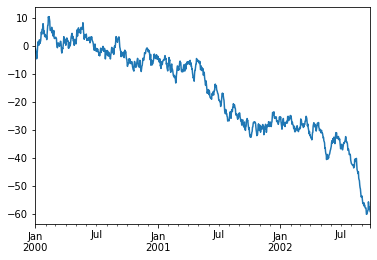

In [70]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

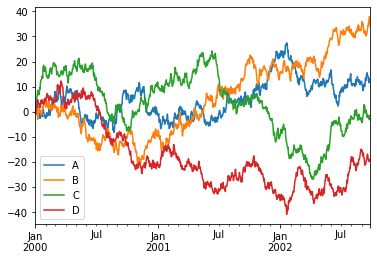

In [71]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')